# Práctica 1. Aprendizaje Automático

Authors: Carlos Iborra Llopis (100451170), Alejandra Galán Arrospide (100451273) <br>
For additional notes and requirements: https://github.com/carlosiborra/Grupo02-Practica2-AprendizajeAutomatico

❗If you are willing to run the code yourself, please clone the full GitHub repository, as it contains the necessary folder structures to export images and results❗

# 0. Table of contents


---
# 1. Requirements


In [ ]:
""" Importing necessary libraries """
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import missingno as msno
import seaborn as sns
import scipy.stats as st
import scipy
import sklearn

from matplotlib.cbook import boxplot_stats as bps

### 1.1. Cleaning ../data/img/ folder
This way we avoid creating multiple images and sending the old ones to the trash.<br>
Also using this to upload cleaner commits to GitHub.


In [ ]:
""" Cleaning the ../data/img/ folder """
import os
import glob

files = glob.glob("../data/img/*")
for f in files:
    if os.path.isfile(f) and f.endswith(".png"):
        os.remove(f)

---
# 2. Reading the datasets
Reading the datasets from the bz2 files, group 2.

In [ ]:
import pickle

with open('../data/attrition_available_2.pkl', 'rb') as pkl_file:
    datos = pickle.load(pkl_file)

datos # TODO: FIX THIS

In [ ]:
# Export the data to a csv file
datos.to_csv('../data/attrition_available_2.csv', index=False)

---
# 3. EDA

<mark>(0,15 puntos) Hacer un EDA muy simplificado: cuántas instancias / cuantos 
atributos y de qué tipo (numéricos, ordinales, categóricos); columnas constantes o 
innecesarias; que proporción de missing values por atributo; tipo de problema: 
(clasificación o regresión); ¿es desbalanceado?</mark>

**Key Concepts of Exploratory Data Analysis**

- **2 types of Data Analysis**
  - Confirmatory Data Analysis
  - Exploratory Data Analysis
- **4 Objectives of EDA**
  - Discover Patterns
  - Spot Anomalies
  - Frame Hypothesis
  - Check Assumptions
- **2 methods for exploration**
  - Univariate Analysis
  - Bivariate Analysis
- **Stuff done during EDA**
  - Trends
  - Distribution
  - Mean
  - Median
  - Outlier
  - Spread measurement (SD)
  - Correlations
  - Hypothesis testing
  - Visual Exploration


## 3.0. Dataset preparation

To conduct exploratory data analysis (EDA) on our real data, we need to prepare the data first. Therefore, we have decided to separate the data into training and test sets at an early stage to avoid data leakage, which could result in an overly optimistic evaluation of the model, among other consequences. This separation will be done by dividing the data prematurely into training and test sets since potential data leakage can occur from the usage of the test partition, especially when including the result variable.

It is important to note that this step is necessary because all the information obtained in this section will be used to make decisions such as dimensionality reduction. Furthermore, this approach makes the evaluation more realistic and rigorous since the test set is not used until the end of the process.

### 3.0.1. Stratified K-Fold Cross-Validation
To ensure a fair and unbiased evaluation of our model's performance, we will be using stratified k-fold for dividing our data into training and test sets. Stratified k-fold is a commonly used technique in machine learning that ensures that the distribution of classes in the training and test sets is similar, thus reducing the risk of introducing bias into our model's performance evaluation.

By using stratified k-fold, we can ensure that each fold of the data used for training and testing our model contains a representative sample of all the classes in the dataset. This helps to account for any potential class imbalance in the data, ensuring that our model is trained and tested on a diverse set of data, leading to a more reliable evaluation of its performance.

Note: as we are second group, we will be using 2 as our random state seed.

<mark>Simplemente dividiremos los datos en un conjunto de train para entrenar y ajustar hiper-parámetros, y un conjunto de test en el que evaluaremos las distintas posibilidades 
que se probarán en la práctica. Hay que recordar que En problemas de clasificación 
desbalanceados hay que usar particiones estratificadas y métricas adecuadas 
(balanced_accuracy, f1, matriz de confusión). También es conveniente que los 
métodos de construcción de modelos traten el desbalanceo, usando por ejemplo 
el parámetro class_weight=”balanced”</mark>

In [ ]:
# Import the necessary libraries
from sklearn.model_selection import StratifiedKFold

In [ ]:
""" Train Test Split using Stratified K-Fold """

# Make a copy of the data (we will re-split the data later to ensure that the data is not contaminated)
datos_copy = datos.copy()

# Define the number of folds for stratified k-fold cross-validation
n_splits = 5

# Initialize the StratifiedKFold object
stratified_kfold = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=42)

# Iterate over the stratified k-fold splits
for train_index, test_index in stratified_kfold.split(datos_copy, datos_copy['Attrition']):
    # Split the data into training and test sets using the current split indices
    train_set = datos_copy.iloc[train_index]
    test_set = datos_copy.iloc[test_index]
    
    # Extract the features (X) and target (y) from the training and test sets
    X_train = train_set.drop('Attrition', axis=1)  # Drop the 'Attrition' column to get the features
    y_train = train_set['Attrition']  # Extract the 'Attrition' column as the target
    
    X_test = test_set.drop('Attrition', axis=1)  # Drop the 'Attrition' column to get the features
    y_test = test_set['Attrition']  # Extract the 'Attrition' column as the target
 

Check the train-test division correctness

In [ ]:
# Show the head of X_train, y_train, X_test, y_test
print("--------------------\n")
print(f"{X_train.head()}", f"{y_train.head()}", f"{X_test.head()}", f"{y_test.head()}", sep="\n--------------------\n")
print("--------------------\n")

print(f"{X_train.shape}, {y_train.shape}, {X_test.shape}, {y_test.shape}")

# Check is division summatory is correct
if X_train.shape[0] + X_test.shape[0] == datos_copy.shape[0]:
    print(
        f"\nThe train test division is correct: {X_train.shape[0]} + {X_test.shape[0]} = {datos_copy.shape[0]}"
    )
else:
    print("\nERROR: The train test division is incorrect")


In [7]:
# Check the train-test division correctness by comparing the class distribution in the original dataset and the train and test sets.
print("\n--------------------\n")
print("Original dataset class distribution:\n", datos_copy['Attrition'].value_counts(normalize=True))
print("\n--------------------\n")
print("Train set class distribution:\n", y_train.value_counts(normalize=True))
print("\n--------------------\n")
print("Test set class distribution:\n", y_test.value_counts(normalize=True))
print("\n--------------------\n")


--------------------

Original dataset class distribution:
 No     0.838776
Yes    0.161224
Name: Attrition, dtype: float64

--------------------

Train set class distribution:
 No     0.838719
Yes    0.161281
Name: Attrition, dtype: float64

--------------------

Test set class distribution:
 No     0.839002
Yes    0.160998
Name: Attrition, dtype: float64

--------------------



As we can observe, the class distribution is almost perfectly preserved in both the training and test sets and that the sum of the number of rows in train and test give us the total amount of rows in the raw dataset. This is due to the fact that the stratified k-fold algorithm does not guarantee that the class distribution is exactly the same in each fold, but rather that it is similar.

Also, we can notice how the distribution of the classes is very similar in both the training and test sets, which is a good sign.

## 3.1. Dataset and problem description

The dataset we are given contains the following atributes information:

0. **hrs**: The number of hours worked by the employee (float64)
1. **absences**: The number of absences taken by the employee (float64)
2. **JobInvolvement**: The level of involvement the employee has in their job (float64)
3. **PerformanceRating**: The employee's performance rating (float64)
4. **EnvironmentSatisfaction**: The level of satisfaction the employee has with their work environment (float64)
5. **JobSatisfaction**: The level of satisfaction the employee has with their job (float64)
6. **WorkLifeBalance**: The balance between work and personal life for the employee (float64)
7. **Age**: The age of the employee (float64)
8. **Attrition**: Whether the employee has left the company or not (object) -> **Target variable**
9. **BusinessTravel**: The frequency of the employee's business travel (object)
10. **Department**: The department the employee works in (object)
11. **DistanceFromHome**: The distance from the employee's home to their workplace (float64)
12. **Education**: The highest level of education attained by the employee (int64)
13. **EducationField**: The field of study the employee specialized in (object)
14. **EmployeeCount**: The number of employees in the company (float64)
15. **EmployeeID**: A unique identifier for each employee (int64)
16. **Gender**: The gender of the employee (object)
17. **JobLevel**: The employee's job level in the company hierarchy (float64)
18. **JobRole**: The specific role the employee has in their department (object)
19. **MaritalStatus**: The employee's marital status (object)
20. **MonthlyIncome**: The employee's monthly income (float64)
21. **NumCompaniesWorked**: The number of companies the employee has worked for before joining the current company (float64)
22. **Over18**: Whether the employee is over 18 years old (presumably all employees are) (object)
23. **PercentSalaryHike**: The percentage of salary increase the employee received in their last salary hike (float64)
24. **StandardHours**: The standard number of working hours in the company (float64)
25. **StockOptionLevel**: The level of stock option the employee has (float64)
26. **TotalWorkingYears**: The total number of years the employee has worked (float64)
28. **TrainingTimesLastYear**: The number of times the employee received training in the last year (float64)
29. **YearsAtCompany**: The number of years the employee has been with the company (float64)
30. **YearsSinceLastPromotion**: The number of years since the employee's last promotion (float64)
31. **YearsWithCurrManager**: The number of years the employee has been with their current manager (float64)

**Note**: the values in between parenthesis correspond to the value type of each column in the dataset.

In [8]:
num_atributos  = len(datos.keys())
print("Se poseen", num_atributos, "atributos.")
num_instances = len(datos)
print("Se poseen", num_instances, "instancias.")

Se poseen 31 atributos.
Se poseen 4410 instancias.


In [9]:
train_set.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3528 entries, 1 to 4409
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   hrs                      2917 non-null   float64
 1   absences                 2860 non-null   float64
 2   JobInvolvement           2888 non-null   float64
 3   PerformanceRating        2834 non-null   float64
 4   EnvironmentSatisfaction  2757 non-null   float64
 5   JobSatisfaction          2914 non-null   float64
 6   WorkLifeBalance          2891 non-null   float64
 7   Age                      2892 non-null   float64
 8   Attrition                3528 non-null   object 
 9   BusinessTravel           2929 non-null   object 
 10  Department               2861 non-null   object 
 11  DistanceFromHome         2975 non-null   float64
 12  Education                2904 non-null   float64
 13  EducationField           3528 non-null   object 
 14  EmployeeCount           

## 3.2. Missing values

Fist, we check the number the total number of missing values in the dataset in order to know if we have to clean the dataset or not.

We use the train_set partition (and not X_train nor y_train) as it contains both the target variable and the rest of the features.

In [10]:
print(train_set.isna().sum())

hrs                        611
absences                   668
JobInvolvement             640
PerformanceRating          694
EnvironmentSatisfaction    771
JobSatisfaction            614
WorkLifeBalance            637
Age                        636
Attrition                    0
BusinessTravel             599
Department                 667
DistanceFromHome           553
Education                  624
EducationField               0
EmployeeCount              738
EmployeeID                   0
Gender                     712
JobLevel                   602
JobRole                    632
MaritalStatus              618
MonthlyIncome              650
NumCompaniesWorked         771
Over18                     687
PercentSalaryHike          612
StandardHours              731
StockOptionLevel           640
TotalWorkingYears          658
TrainingTimesLastYear      770
YearsAtCompany             588
YearsSinceLastPromotion    619
YearsWithCurrManager         0
dtype: int64


### 3.2.1. Missing values visualization

<Axes: >

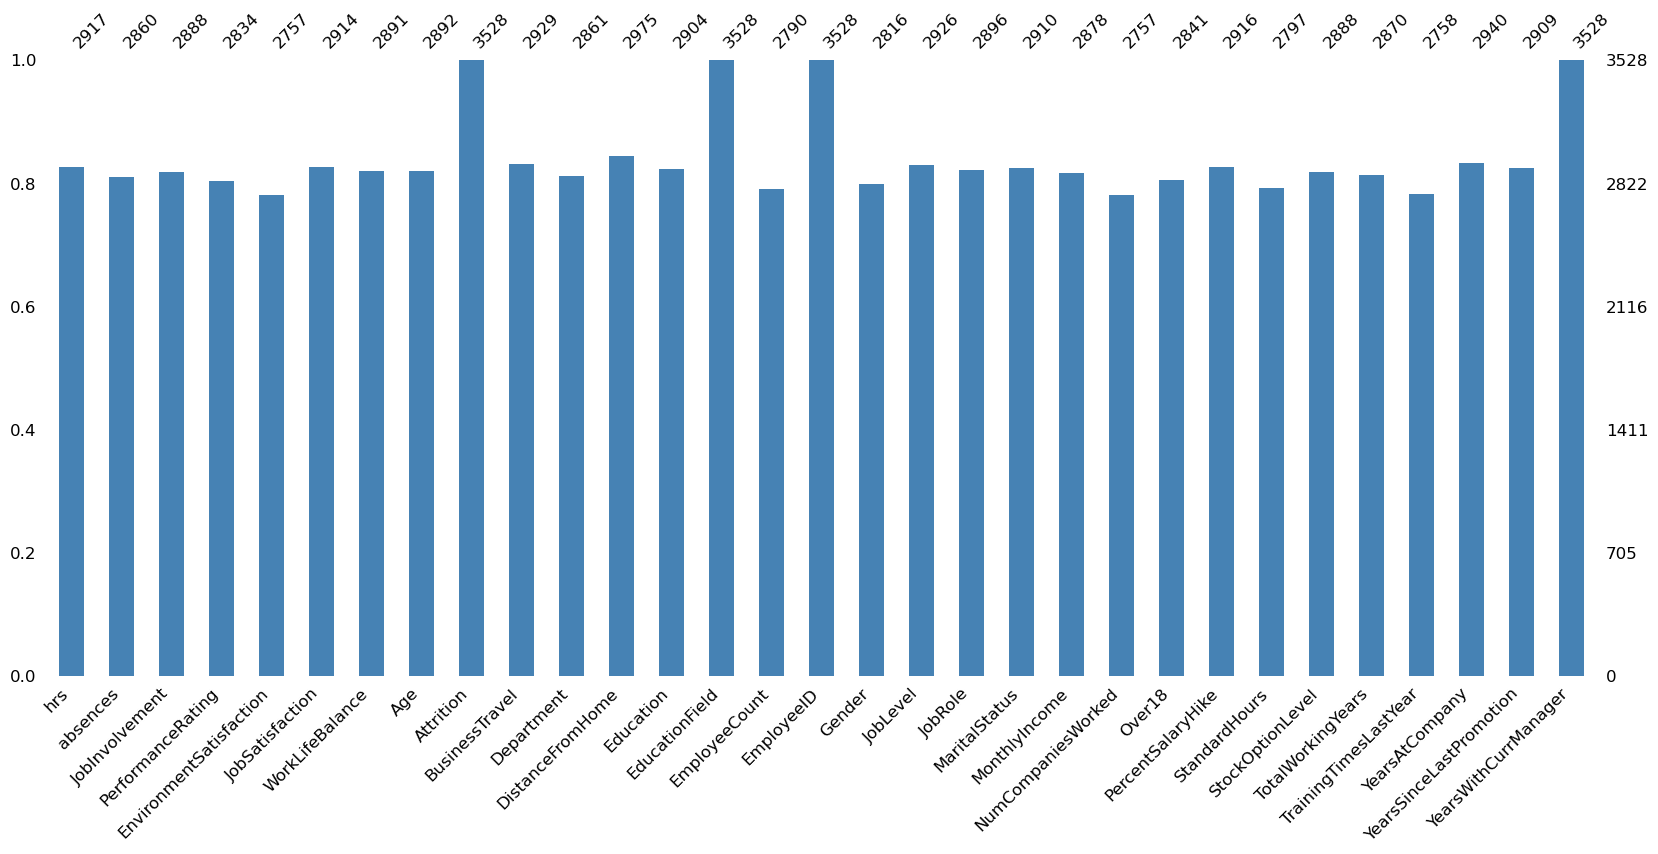

In [15]:
""" Missing values bar plot """
msno.bar(train_set, figsize=(20, 8), fontsize=12, color='steelblue', labels=True)

<Axes: >

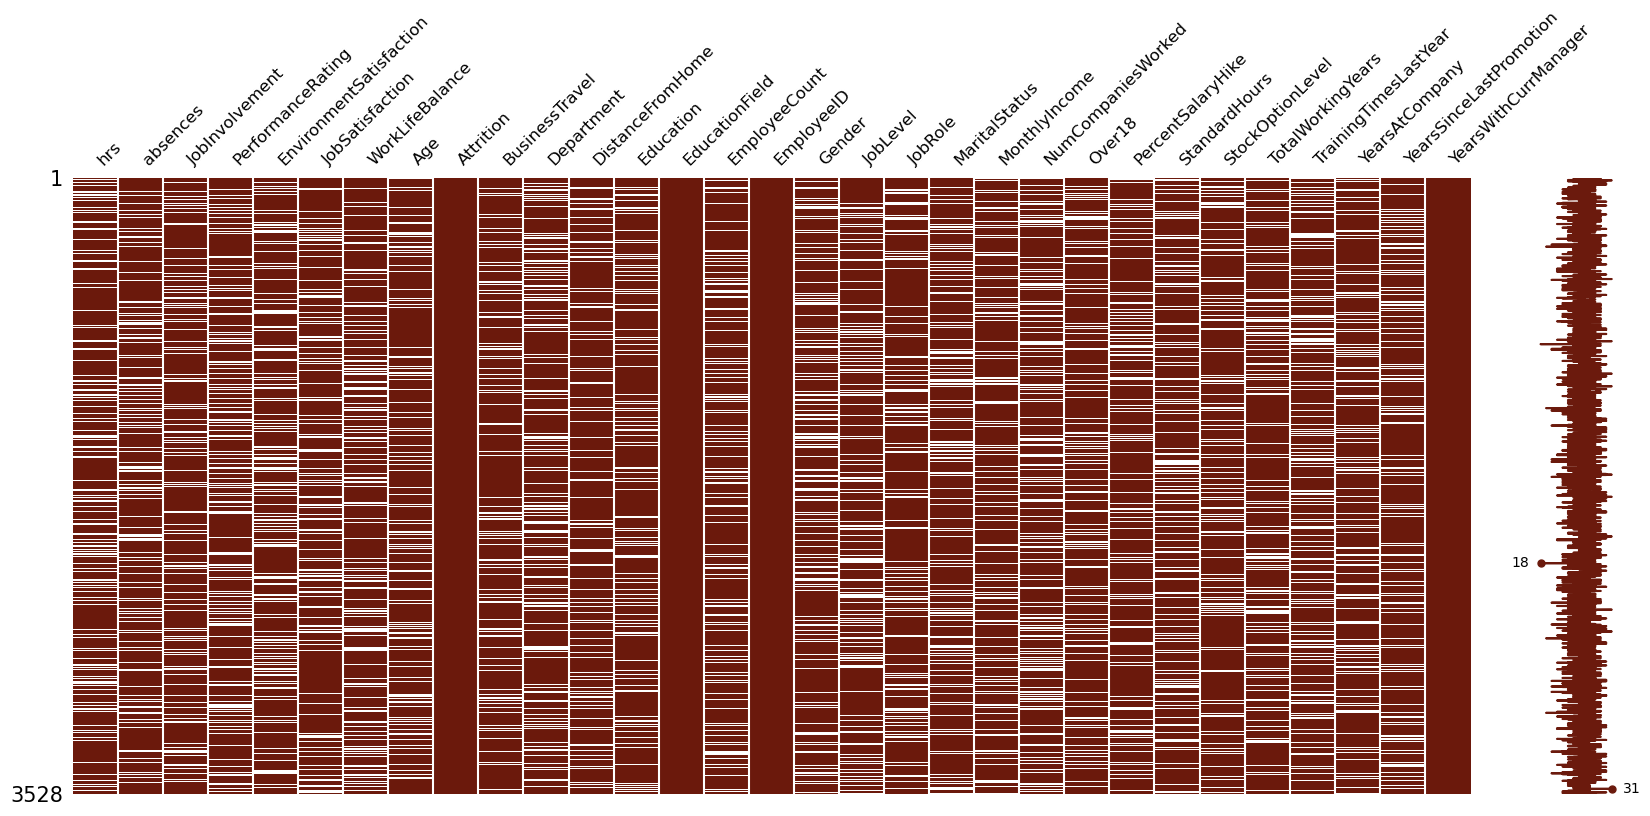

In [19]:
""" Missing values matrix """
msno.matrix(train_set, figsize=(20, 8), fontsize=12, color=(0.42, 0.1, 0.05))

<Axes: >

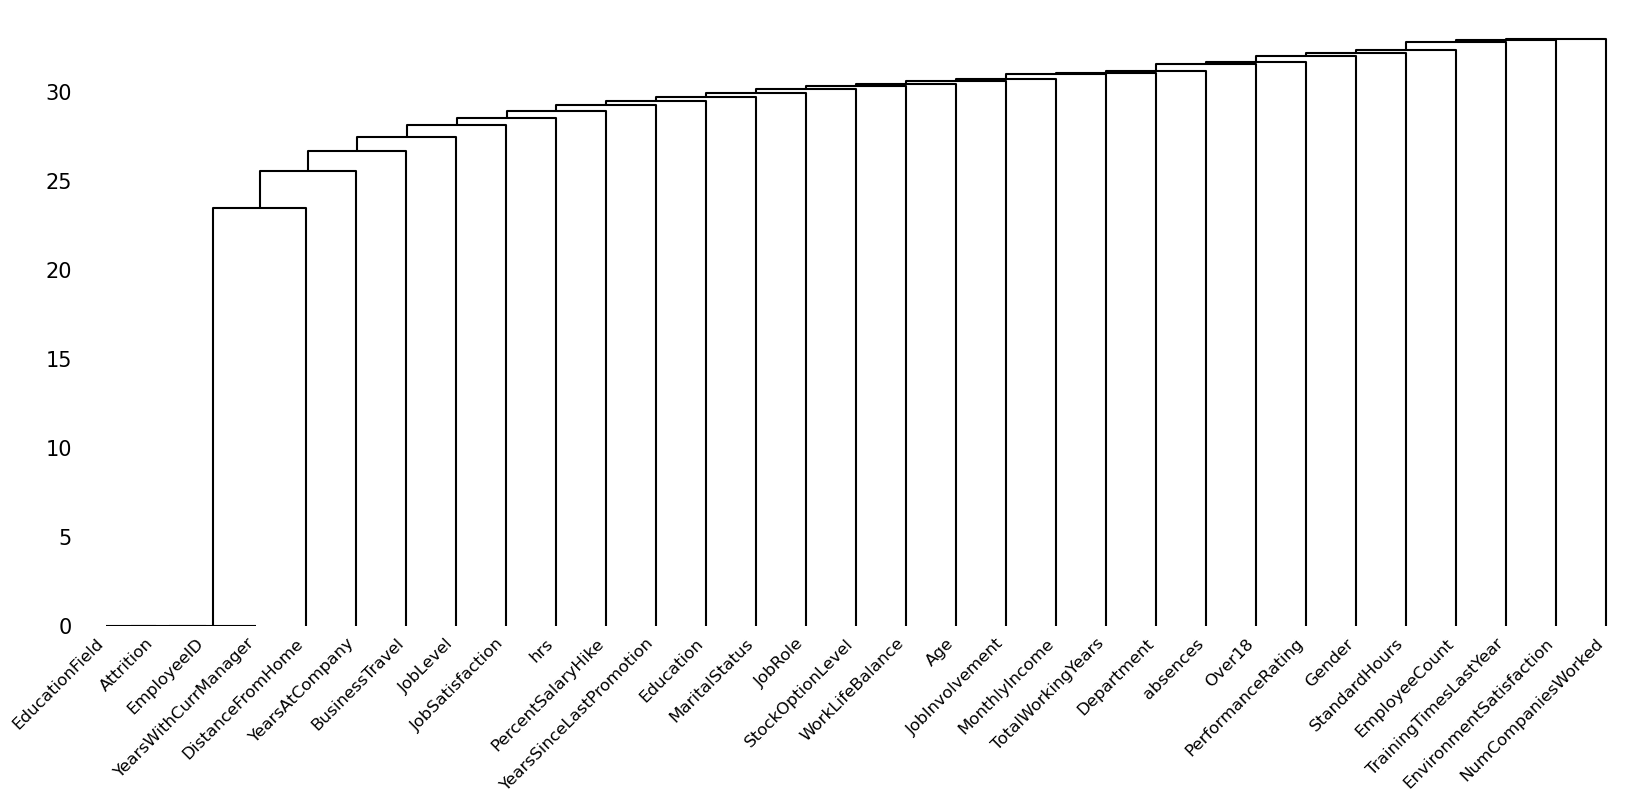

In [23]:
""" Missing values dendrogram """
msno.dendrogram(train_set, figsize=(20, 8), fontsize=12, orientation='top')

### 3.2.2. Observations and conclusion

- Many variables have a significant number of missing values, ranging from 588 to over 771 missing values, which means that having 4410 rows in the dataset, we have a significant number of missing values ranging from 13.3% to 17.5% of the total number of rows in the dataset, which is significant.
  
  These variables include: 'hrs', 'absences', 'JobInvolvement', 'PerformanceRating', 'EnvironmentSatisfaction', 'JobSatisfaction', 'WorkLifeBalance', 'Age', 'BusinessTravel', 'Department', 'DistanceFromHome', 'Education', 'EmployeeCount', 'Gender', 'JobLevel', 'JobRole', 'MaritalStatus', 'MonthlyIncome', 'NumCompaniesWorked', 'Over18', 'PercentSalaryHike', 'StandardHours', 'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear', 'YearsAtCompany', and 'YearsSinceLastPromotion'.

- Some variables have no missing values, such as 'Attrition' (as it is the target variable), 'EducationField', and 'YearsWithCurrManager'.

It's important to note that missing values can have an impact on the quality and reliability of the data and may require appropriate handling techniques, such as imputation or deletion, depending on the specific analysis or modeling objectives.

## 3.3. Outliers


Detecting outliers in a dataset before training a model is crucial because outliers can significantly affect the performance and accuracy of the model. Outliers are data points that deviate significantly from the rest of the dataset and can cause the model to learn incorrect patterns and relationships. When outliers are present in the data, they can also increase the variance of the model, which can result in overfitting. Overfitting occurs when the model fits too closely to the training data, leading to poor generalization to new data. Therefore, it is important to detect and handle outliers properly to ensure the model's accuracy and robustness.

### 3.3.1. Outliers visualization

### 3.3.1.1. Boxplot

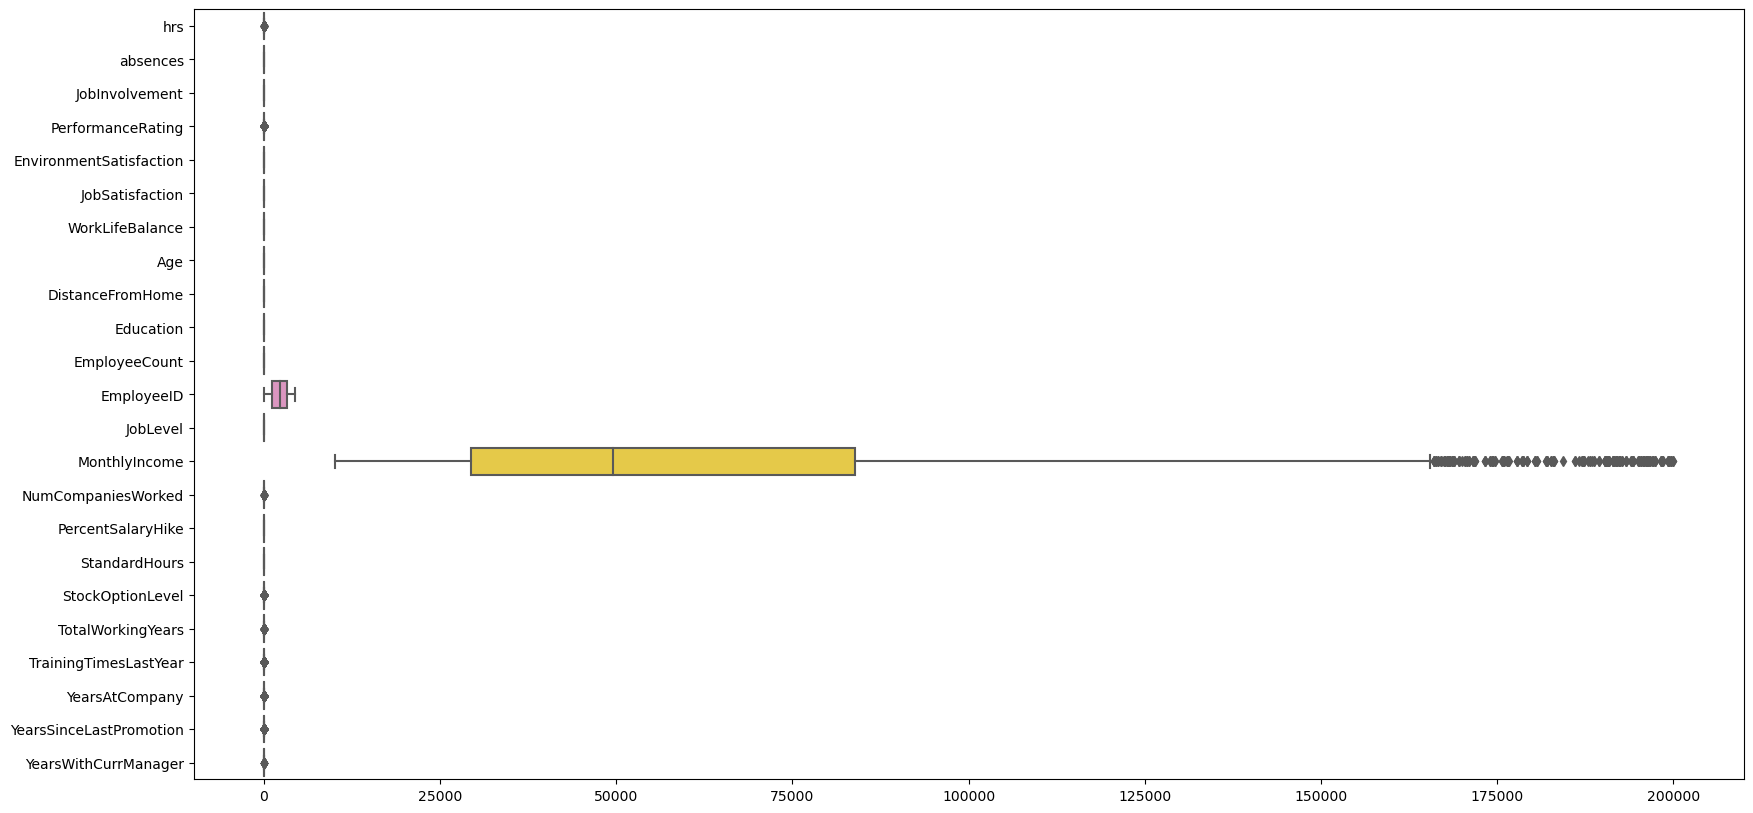

In [25]:
""" Box plot to detect outliers """
fig, ax = plt.subplots(figsize=(20, 10))
sns.boxplot(data=train_set, orient='h', palette='Set2')
plt.show()

#### 3.3.1.2. Histogram

/tmp/ipykernel_16729/2777508782.py:4: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared.
  train_set.hist(ax=ax)


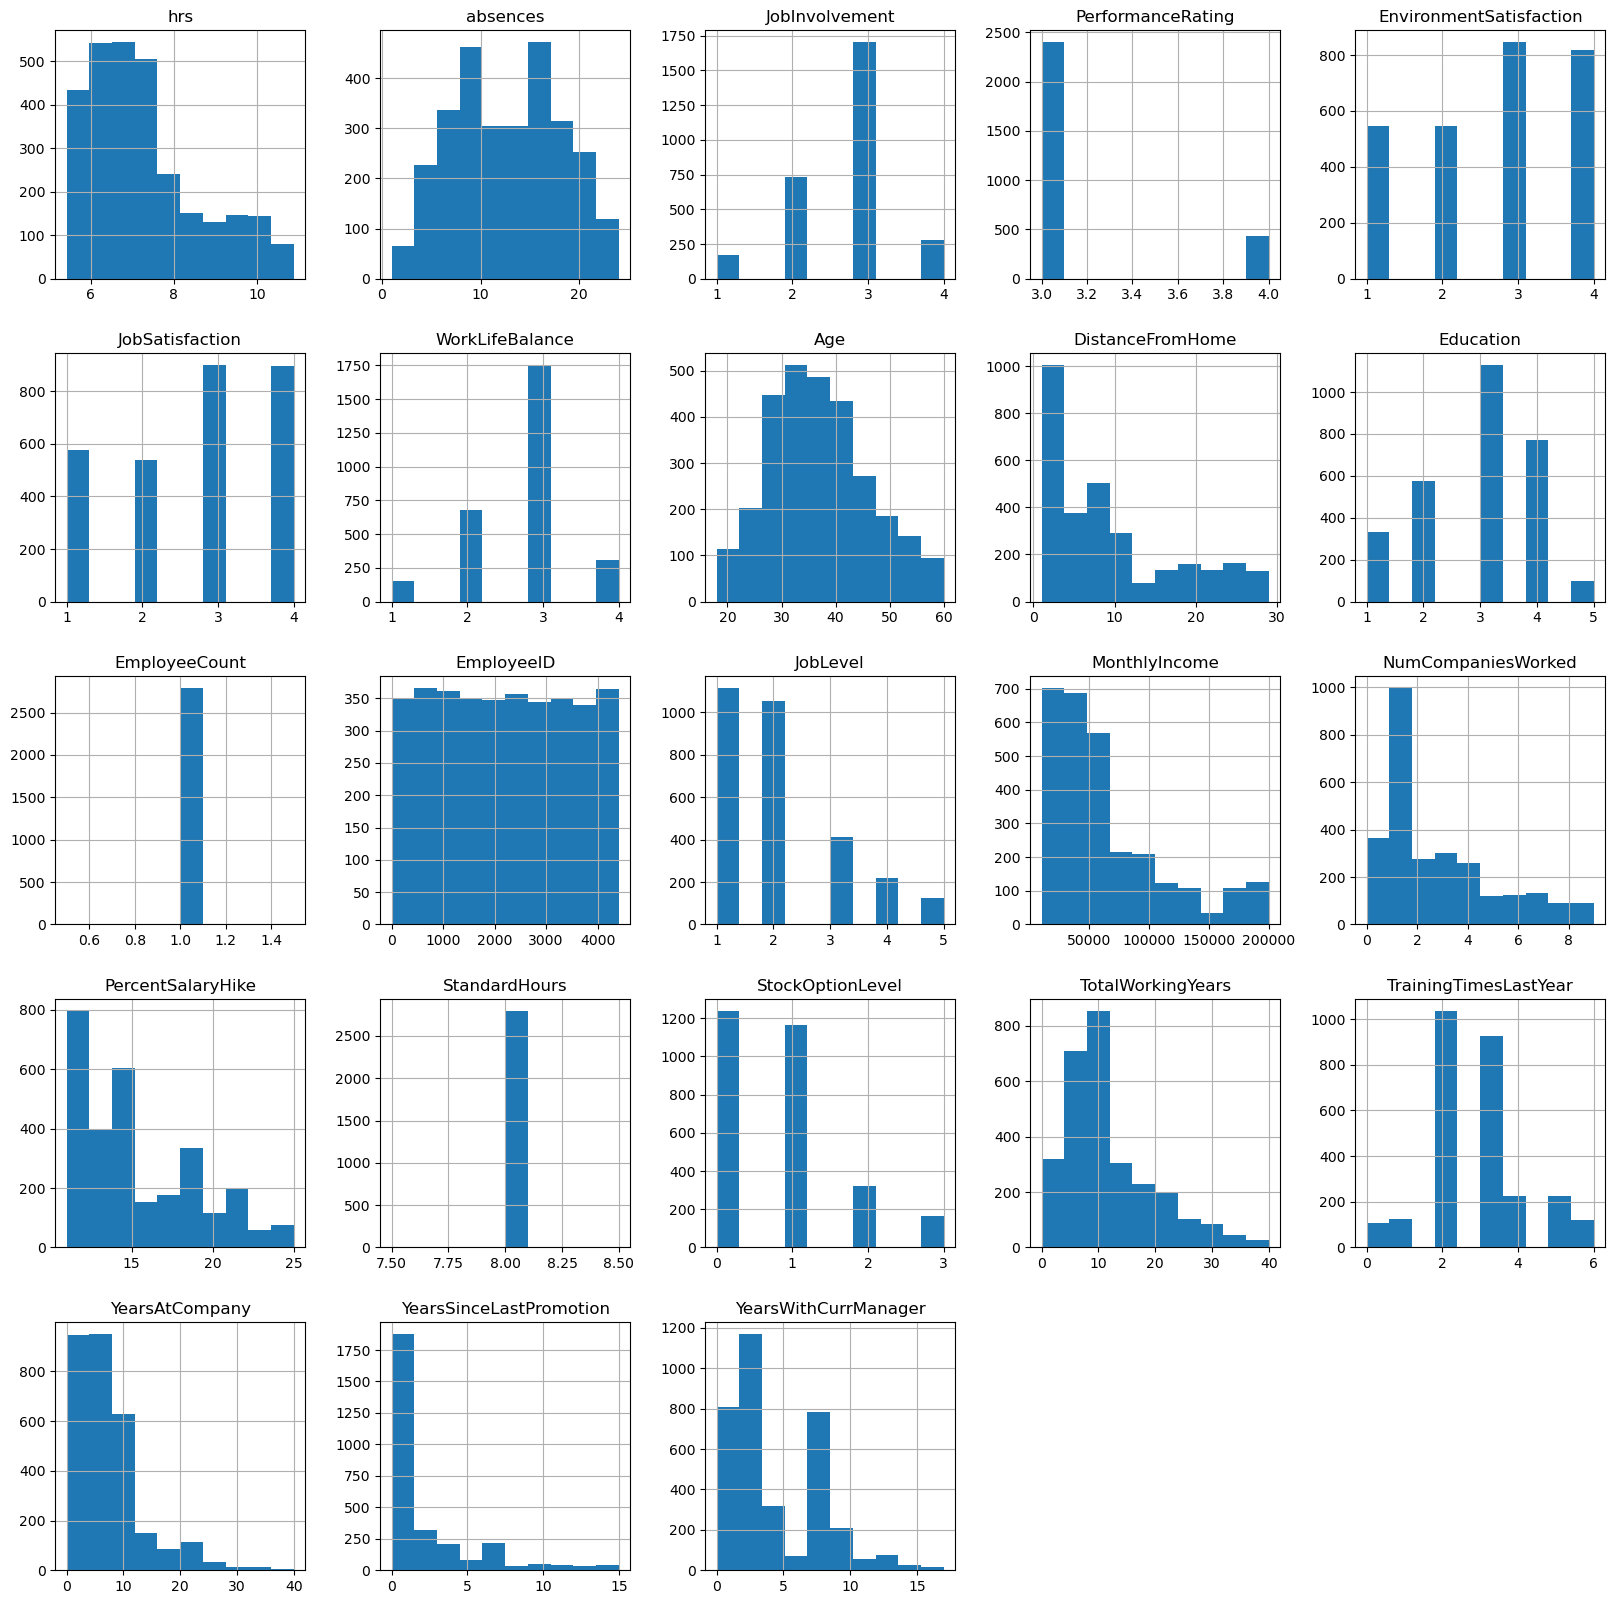

In [34]:
""" Histograms to detect outliers """
# Histogram for numerical variables
fig, ax = plt.subplots(figsize=(20, 20))
train_set.hist(ax=ax)
plt.show()

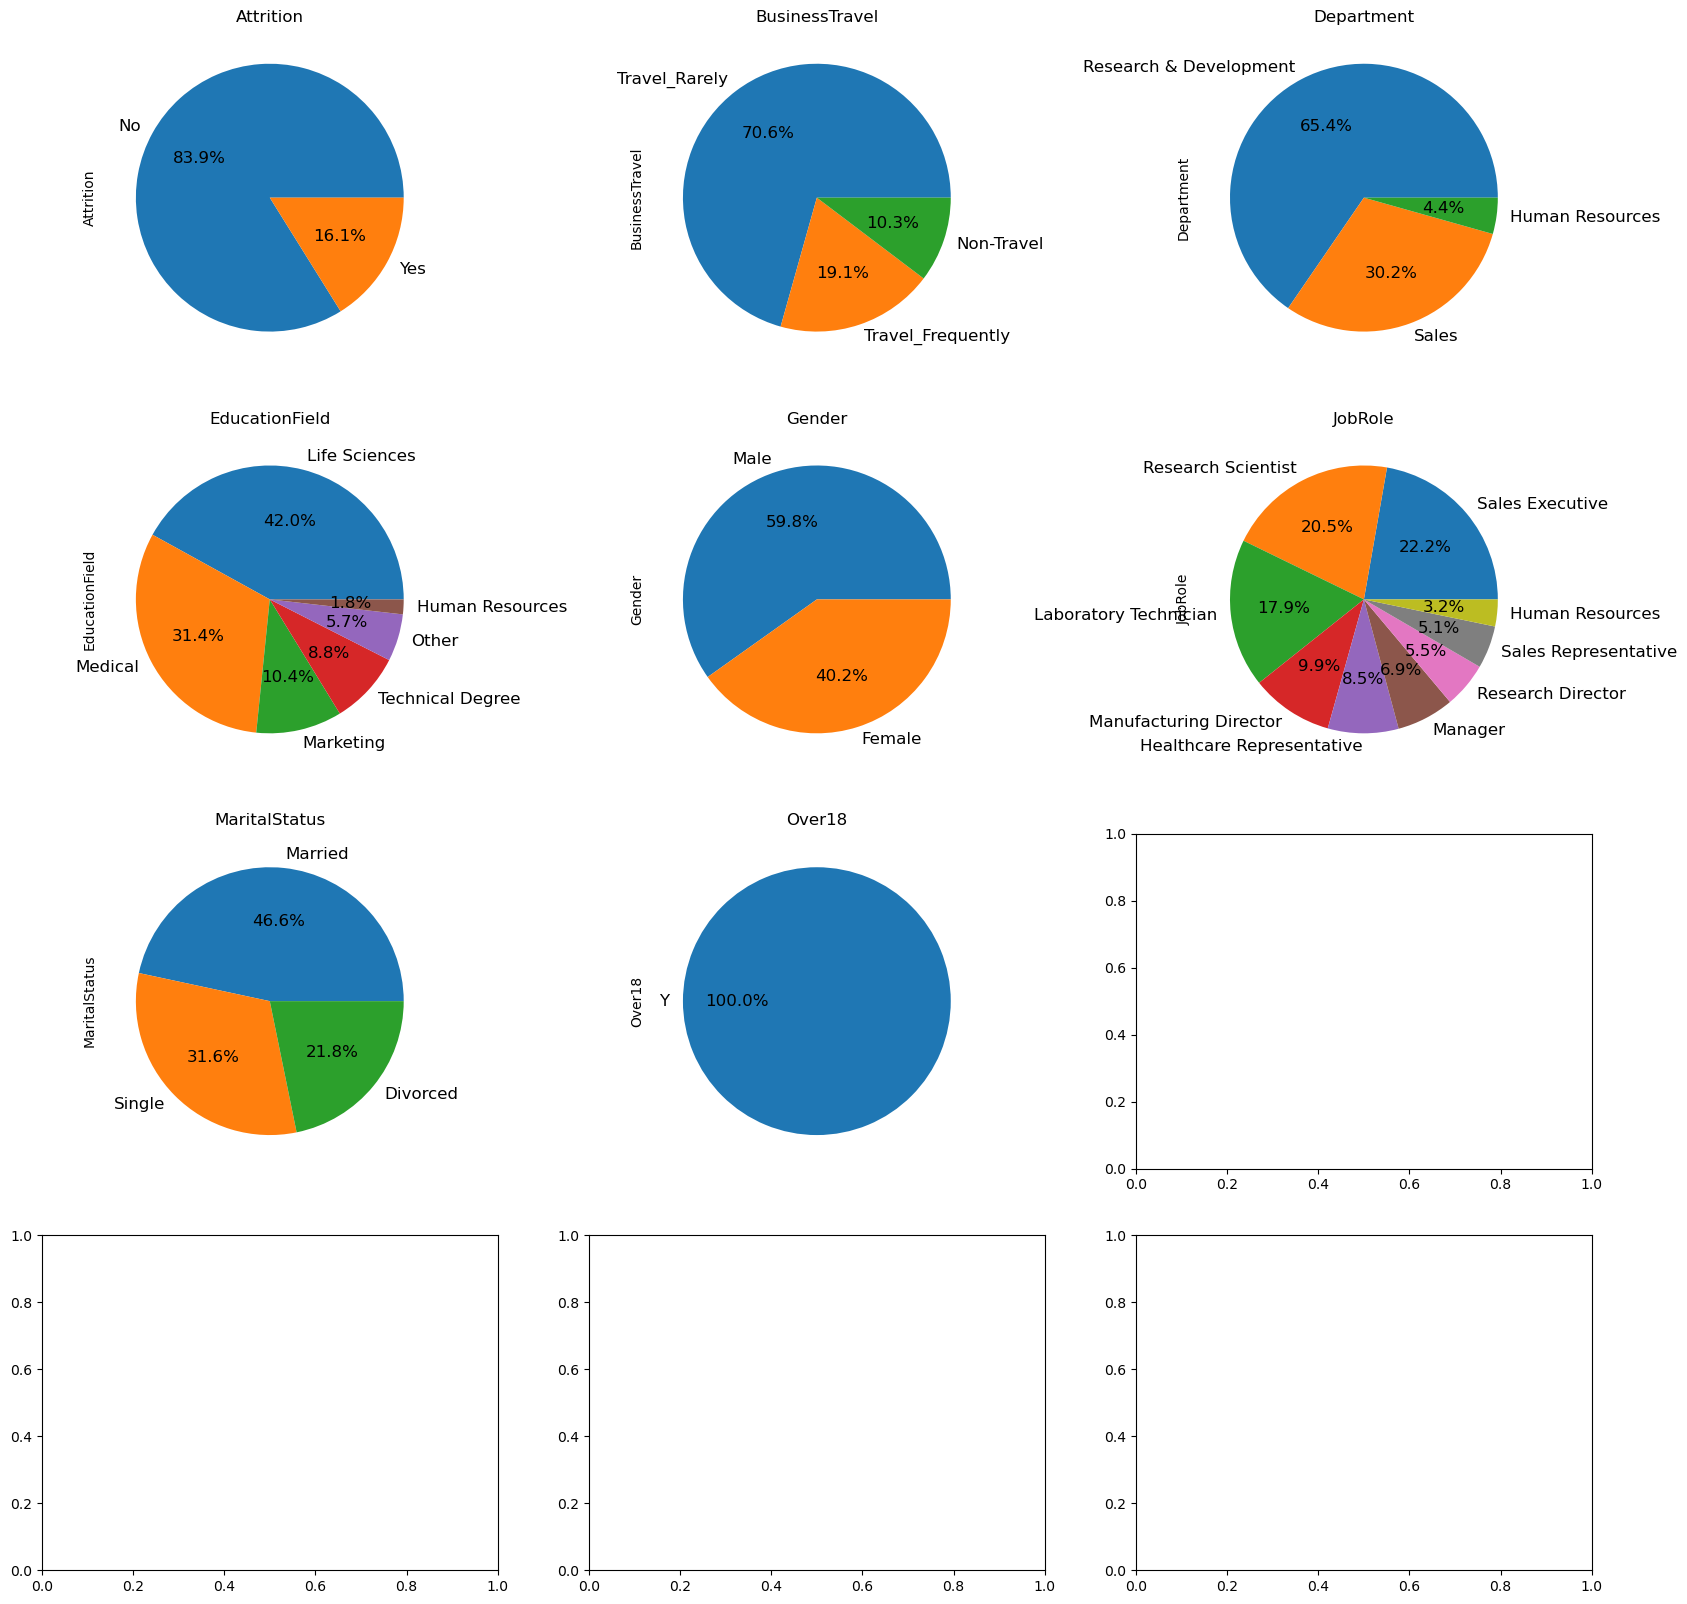

In [35]:
""" Pie series to detect outliers for categorical variables """
# TODO: NO SIRVE PARA OUTLIERS
# Pie series for categorical variables
fig, ax = plt.subplots(4, 3, figsize=(20, 20))
for i, col in enumerate(train_set.select_dtypes(include='object')):
    train_set[col].value_counts().plot.pie(ax=ax[i//3, i%3], autopct='%1.1f%%', fontsize=12, title=col)
plt.show()


## 3.4. Correlation


In this section we are getting information about the correlation of the variables between them. This information is valuable in order to make good decisions when deleting redundant attributes. Also note we are getting information about the correlation between each attribute and the solution variable. This allows us to know the most relevant attributes, making the best decisions when creating the different models.  

---
# 4. Train-Test division 

Since we are working with a time dependent data, we need to avoid mixing it. Also, we are required to add the first 10 years of data to the train set and the last 2 years to the test set. This means we are assigning a 83.333333 percent of the data to train and a 16.66666666 to test.

**Note**: This division was already done before the EDA. We overwrite it to start from a clean state.

<mark>En esta práctica la evaluación será más sencilla que en la primera. Simplemente 
dividiremos los datos en un conjunto de train para entrenar y ajustar hiper-
parámetros, y un conjunto de test en el que evaluaremos las distintas posibilidades 
que se probarán en la práctica. Hay que recordar que En problemas de clasificación 
desbalanceados hay que usar particiones estratificadas y métricas adecuadas 
(balanced_accuracy, f1, matriz de confusión). También es conveniente que los 
métodos de construcción de modelos traten el desbalanceo, usando por ejemplo 
el parámetro class_weight=”balanced”.</mark>

## 4.1. Train-Test split

## 4.2. Train-Test RMSE and MAE function

## 4.3. Print model results

## 4.4. Validation splits

## Decisions for all models 

For each possible method we have created two different models; One with predefined parameters and the second one with selected parameters. For each model we create a pipeline which includes the escaler ( except for trees and related ) and the model.  Note that we have selected RobustEscaler as our scaling method since we have found several outliers in the EDA. Secondly, we duplicate this two models per method and we add the selection of attributes. Note that the model with no selection of attributes and the one with selection of attributes have a double pipeline. Is a double pipeline since we use the output of the first pipeline ( best hiper-parameters ) directly into the second pipeline in order to avoid innecesary computing cost.

We have decided to train all models in the most similar way possible in order for the results to be comparable. This way, all models with selected parameters use RandomSearch in order to avoid unnecessary computational cost while still producing good results. Secondly, we have decided to use TimeSeriesSplit, which is a useful method when working with time-related data. We also perform a cross-validation within the parameter search in order to avoid optimistic scoring for some parameters. For all models, we are using a 5-fold cross-validation. We also decided to use NMAE as our method for testing error since it provides an easy-to-understand score and reduces the weight of outliers (as observed during the EDA process).

In addition note that in order to create the predefined models we are using gridsearch with just one option in the param-grid. This help us stay consistent in the way we create and compare models, since it provides a way of using cross-validation within the function. 

---
# 5. Model construction

<mark>(1.3 puntos) Construcción de modelos: para esta práctica usaremos
LogisticRegression como método base (sin ajustar hiper-parámetros) y Boosting
como método avanzado (ajustando hiper-parámetros), a elegir. Es importante 
realizar los preprocesos que los datos necesiten, usando preferentemente 
pipelines. Como método de boosting, se puede elegir uno de entre los métodos de 
boosting disponibles en scikit-learn. Si además se usa uno de entre las librerías 
externas xgboost, lightgbm o catboost, se pueden sacar +0.35 puntos adicionale</mark>

<mark>(0.8 puntos) Usando algún método de selección de atributos de tipo filter
(SelectKBest) de entre los disponibles en sklearn (f_classif, 
mutual_info_classif o chi2), comprobad si se pueden mejorar los resultados del 
apartado anterior y extraer conclusiones sobre qué atributos son más importantes, 
al menos de acuerdo a estos métodos</mark>

## 5.1. Logistic Regression
Logistic regression with no hyperparameter tuning. It will be used as a baseline for the rest of the models.

### 5.1.1. Logistic Regression - Predefined parameters

#### 5.1.1.1. Logistic Regression - Predefined parameters - No attribute selection

#### 5.1.1.2. Logistic Regression - Predefined parameters - Attribute selection

## 5.2. Boosting
With <mark>(?)</mark> and without hyperparameter tuning.

<mark>Como método de boosting, se puede elegir uno de entre los métodos de 
boosting disponibles en scikit-learn. Si además se usa uno de entre las librerías 
externas xgboost, lightgbm o catboost, se pueden sacar +0.35 puntos adicionales.</mark>

### 5.2.1. Boosting - Predefined parameters

#### 5.2.1.1. Boosting - Predefined parameters - No attribute selection

#### 5.2.1.2. Boosting - Predefined parameters - Attribute selection

### 5.2.2. Boosting - Selected parameters

#### 5.2.2.1. Boosting - Selected parameters - No attribute selection

#### 5.2.2.2. Boosting - Selected parameters - Attribute selection

<mark>Código en un notebook. Es necesario que a lo largo de la práctica se vayan extrayendo 
conclusiones, y al final de la práctica, hay que hacer un resumen de todos los resultados 
obtenidos, usando tablas y/o gráficos.
● El archivo conteniendo el mejor modelo obtenido (llamado «modelo_final.pkl»).</mark>

## 5.3. Conclusions

---
# 6. Model evaluation

## 8.1. Best Model Selection

### 8.1.1. Best Model Prediction - Test

## 8.2. Selected Model Training

### 8.2.1. Selected Model Prediction and Comparison

## 8.3. Selected Model Export

---
# 9. Final Conclusions

During this project, we have had the opportunity to gain a deeper understanding of the model selection process. We began with exploratory data analysis (EDA), which helped us to improve our understanding and management of the data. We found this to be an extremely useful tool throughout the entire project. We believe that this part of the project should be evaluated with greater emphasis, as it is the foundation upon which all of our decisions were based.

Next, we created and trained all of our models, gaining experience in the use of pipelines and a deeper understanding of the importance of hyperparameters. Finally, we analyzed the different results provided by each model, gaining a better understanding of their respective advantages and disadvantages in terms of scoring and time.

We believe that this project is an excellent complement to the main lessons, as it provides a deeper understanding of the subject matter.

---
# X. Output the Jupyter Notebook as an HTML file

In [ ]:
import os

# Export the notebook to HTML
os.system("jupyter nbconvert --to html model.ipynb --output ../data/html/model.html")
print("Notebook exported to HTML")